In [506]:
#load library
import pandas as pd
import numpy as np
from sklearn import datasets
import numpy as np
import pprint
import sklearn.feature_selection as fs
from __future__ import print_function
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [290]:
accept_df = pd.read_csv('/Users/janethu/Desktop/accepted_2007_to_2017.csv.gz', compression='gzip')

/Users/janethu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0,18,46,54,111,122,123,124,127,128,129,132) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [291]:
reject_df=pd.read_csv('/Users/janethu/Desktop/rejected_2007_to_2017.csv.gz',compression='gzip')

In [292]:
print(accept_df.shape)
print(reject_df.shape)

(1524098, 136)
(14124451, 9)


In [136]:
loan2016=pd.read_csv('/Users/janethu/Desktop/LoanStats_2016Q4.csv',skiprows=1)
reject2016=pd.read_csv('/Users/janethu/Desktop/RejectStats_2016Q4.csv',skiprows=1)

/Users/janethu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [137]:
print(loan2016.shape)
print(reject2016.shape)

(103548, 137)
(1404490, 9)


In [293]:
loan2017=pd.read_csv('/Users/janethu/Desktop/LoanStats_2017Q2.csv.zip',skiprows=1)
reject2017=pd.read_csv('/Users/janethu/Desktop/RejectStats_2017Q2.csv.zip',skiprows=1)

/Users/janethu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [294]:
print(loan2017.shape)
print(reject2017.shape)

(105453, 137)
(1665309, 9)


In [295]:
loan2017.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_amount', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_length', 'hardship_dpd',
       'hardship_loan_status', 'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount'],
      dtype='object', length=137)

In [406]:
len(loan2017.columns)

137

In [296]:
reject2017.columns

Index(['Amount Requested', 'Application Date', 'Loan Title', 'Risk_Score',
       'Debt-To-Income Ratio', 'Zip Code', 'State', 'Employment Length',
       'Policy Code'],
      dtype='object')

In [297]:
loan17_numcols_name=loan2017.dtypes.index[loan2017.dtypes=='float64'].tolist()

In [405]:
len(loan17_numcols_name)

104

In [298]:
deletcol1=loan2017.dtypes.index[loan2017.dtypes!='float64'].tolist()

In [299]:
len(deletcol1)

33

In [300]:
loan17_charcols_name=list(filter(lambda x: x not in loan17_numcols, loan2017.dtypes.index.tolist()))

In [301]:
loan17num=loan2017[loan17_numcols_name]

In [534]:
len(loan17num.columns)

104

In [535]:
variance17num=dict(zip(loan17num.columns, np.var(loan17num, 0)))

In [303]:
test=list(variance17num.keys())

In [540]:
##feature selection 1: variance (Threshold=1)
loan17_selectcols=[]
for k,v in variance17num.items():
    if v>=1:
        loan17_selectcols.append(k)
    

In [541]:
len(loan17_selectcols)

81

In [542]:
loan17_first_selectcols=loan17_selectcols+loan17_charcols_name

In [543]:
len(loan17_first_selectcols)

114

In [544]:
loan2017_new = loan2017[loan17_first_selectcols]
loan2017_new.shape

(105453, 114)

In [545]:
len(set(loan17_first_selectcols))

114

In [533]:
81+33

114

In [546]:
print(loan17_first_selectcols)

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'last_pymnt_amnt', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_

In [548]:
##feature selection 2: missing value percentage
missloan17=loan2017_new.isnull().sum()/len(loan2017_new)

In [549]:
loan17_second_selectcols=missloan17.index[missloan17<0.9]

In [550]:
deletcol2=missloan17.index[missloan17>=0.90]

In [551]:
len(deletcol2)

24

In [552]:
loan17_select=list(filter(lambda x: x not in deletcol2, loan2017_new.dtypes.index.tolist()))

In [553]:
len(set(loan17_select))

90

In [554]:
len(loan17_select)

90

In [555]:
len(loan2017.columns)

137

In [556]:
newloan2017=loan2017[loan17_select]

In [557]:
max(newloan2017.isnull().sum()/len(newloan2017))

0.80727907219329942

In [558]:
newloan2017.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,mths_since_last_delinq,mths_since_last_record,open_acc,revol_bal,...,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,hardship_flag
0,7500.0,7500.0,7500.0,232.79,113000.0,21.43,NaN,NaN,7.0,30569.0,...,206xx,MD,Apr-1999,62.9%,w,Sep-2017,Oct-2017,Sep-2017,INDIVIDUAL,N
1,6000.0,6000.0,6000.0,186.23,74000.0,19.02,NaN,NaN,15.0,5433.0,...,461xx,IN,Feb-2004,14.8%,w,Sep-2017,Oct-2017,Sep-2017,INDIVIDUAL,N
2,4000.0,4000.0,4000.0,120.46,162000.0,8.71,NaN,NaN,12.0,15774.0,...,480xx,MI,May-2001,29%,w,Sep-2017,Oct-2017,Sep-2017,INDIVIDUAL,N
3,3000.0,3000.0,3000.0,105.51,67475.2,17.79,50.0,NaN,15.0,2432.0,...,595xx,MT,Feb-2008,36.3%,w,Sep-2017,Oct-2017,Sep-2017,INDIVIDUAL,N
4,20000.0,20000.0,20000.0,653.93,85000.0,20.82,NaN,NaN,15.0,30759.0,...,605xx,IL,Jun-1966,17.8%,w,Sep-2017,Oct-2017,Sep-2017,INDIVIDUAL,N


In [559]:
newloan2017_input=newloan2017.iloc[:-2,:]

In [560]:
newloan2017_input.shape

(105451, 90)

In [561]:
loan17_targetnotnull=loan2017.iloc[:-2,:]

In [562]:
loan17_targetnotnull.shape

(105451, 137)

In [465]:
#use mean to impute numeric columns, categoric: one hot encoded 
#get ride sec_ column
#the sub_grade and grade has high correlation about interest rate, so do not put these columns in input 

In [563]:
#machine learning predict interest rate
input_cols=newloan2017_input.columns.tolist()
print(len(input_cols))
input_cols.remove('int_rate')
print(len(input_cols))

90
89


In [564]:
'total_il_high_credit_limit' in input_cols

True

In [565]:
'sub_grade' in input_cols

True

In [566]:
'int_rate' in input_cols

False

In [567]:
'grade' in input_cols

True

In [568]:
newlist=loan17_targetnotnull.int_rate.tolist()

In [569]:
newlist[0].replace(' ','').replace('%','')

'7.35'

In [570]:
newloancol=[]
for loan in newlist:
    a=loan.replace(' ','').replace('%','')
    b=float(a)
    newloancol.append(b)

In [571]:
len(newloancol)

105451

In [572]:
newloancol[0]

7.35

In [573]:
loan17_targetnotnull.int_rate=newloancol

/Users/janethu/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


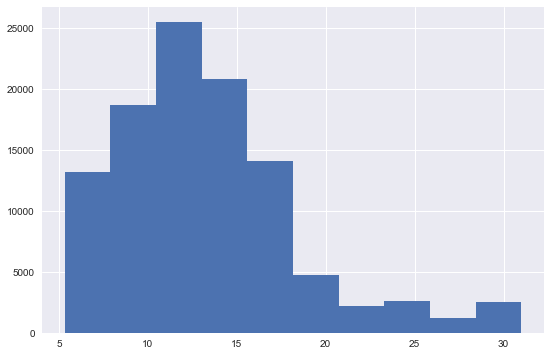

In [574]:
plt.figure(figsize=(9,6))
plt.hist(newloancol,bins=10)
plt.show()

In [575]:
np.var(newloancol, 0)

26.597272451779883

In [576]:
len(input_cols+['int_rate'])

90

In [577]:
#####data set situation####
####input dataset (98 columns without 2 NA int_rate) 
input_df=loan17_targetnotnull[input_cols]
print(input_df.shape)
####output target (int_rate without 2 NA int_rate)
output_int=loan17_targetnotnull['int_rate']
print(output_int.shape)
####select dataframe 99 columns
select_df=loan17_targetnotnull[input_cols+['int_rate']]
print(select_df.shape)

(105451, 89)
(105451,)
(105451, 90)


In [578]:
print(input_df.shape)
print(type(output_int))
print(len(output_int))
input_df.head(5)

(105451, 89)
<class 'pandas.core.series.Series'>
105451


,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,mths_since_last_delinq,mths_since_last_record,open_acc,revol_bal,...,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,hardship_flag
0,7500.0,7500.0,7500.0,232.79,113000.0,21.43,NaN,NaN,7.0,30569.0,...,206xx,MD,Apr-1999,62.9%,w,Sep-2017,Oct-2017,Sep-2017,INDIVIDUAL,N
1,6000.0,6000.0,6000.0,186.23,74000.0,19.02,NaN,NaN,15.0,5433.0,...,461xx,IN,Feb-2004,14.8%,w,Sep-2017,Oct-2017,Sep-2017,INDIVIDUAL,N
2,4000.0,4000.0,4000.0,120.46,162000.0,8.71,NaN,NaN,12.0,15774.0,...,480xx,MI,May-2001,29%,w,Sep-2017,Oct-2017,Sep-2017,INDIVIDUAL,N
3,3000.0,3000.0,3000.0,105.51,67475.2,17.79,50.0,NaN,15.0,2432.0,...,595xx,MT,Feb-2008,36.3%,w,Sep-2017,Oct-2017,Sep-2017,INDIVIDUAL,N
4,20000.0,20000.0,20000.0,653.93,85000.0,20.82,NaN,NaN,15.0,30759.0,...,605xx,IL,Jun-1966,17.8%,w,Sep-2017,Oct-2017,Sep-2017,INDIVIDUAL,N


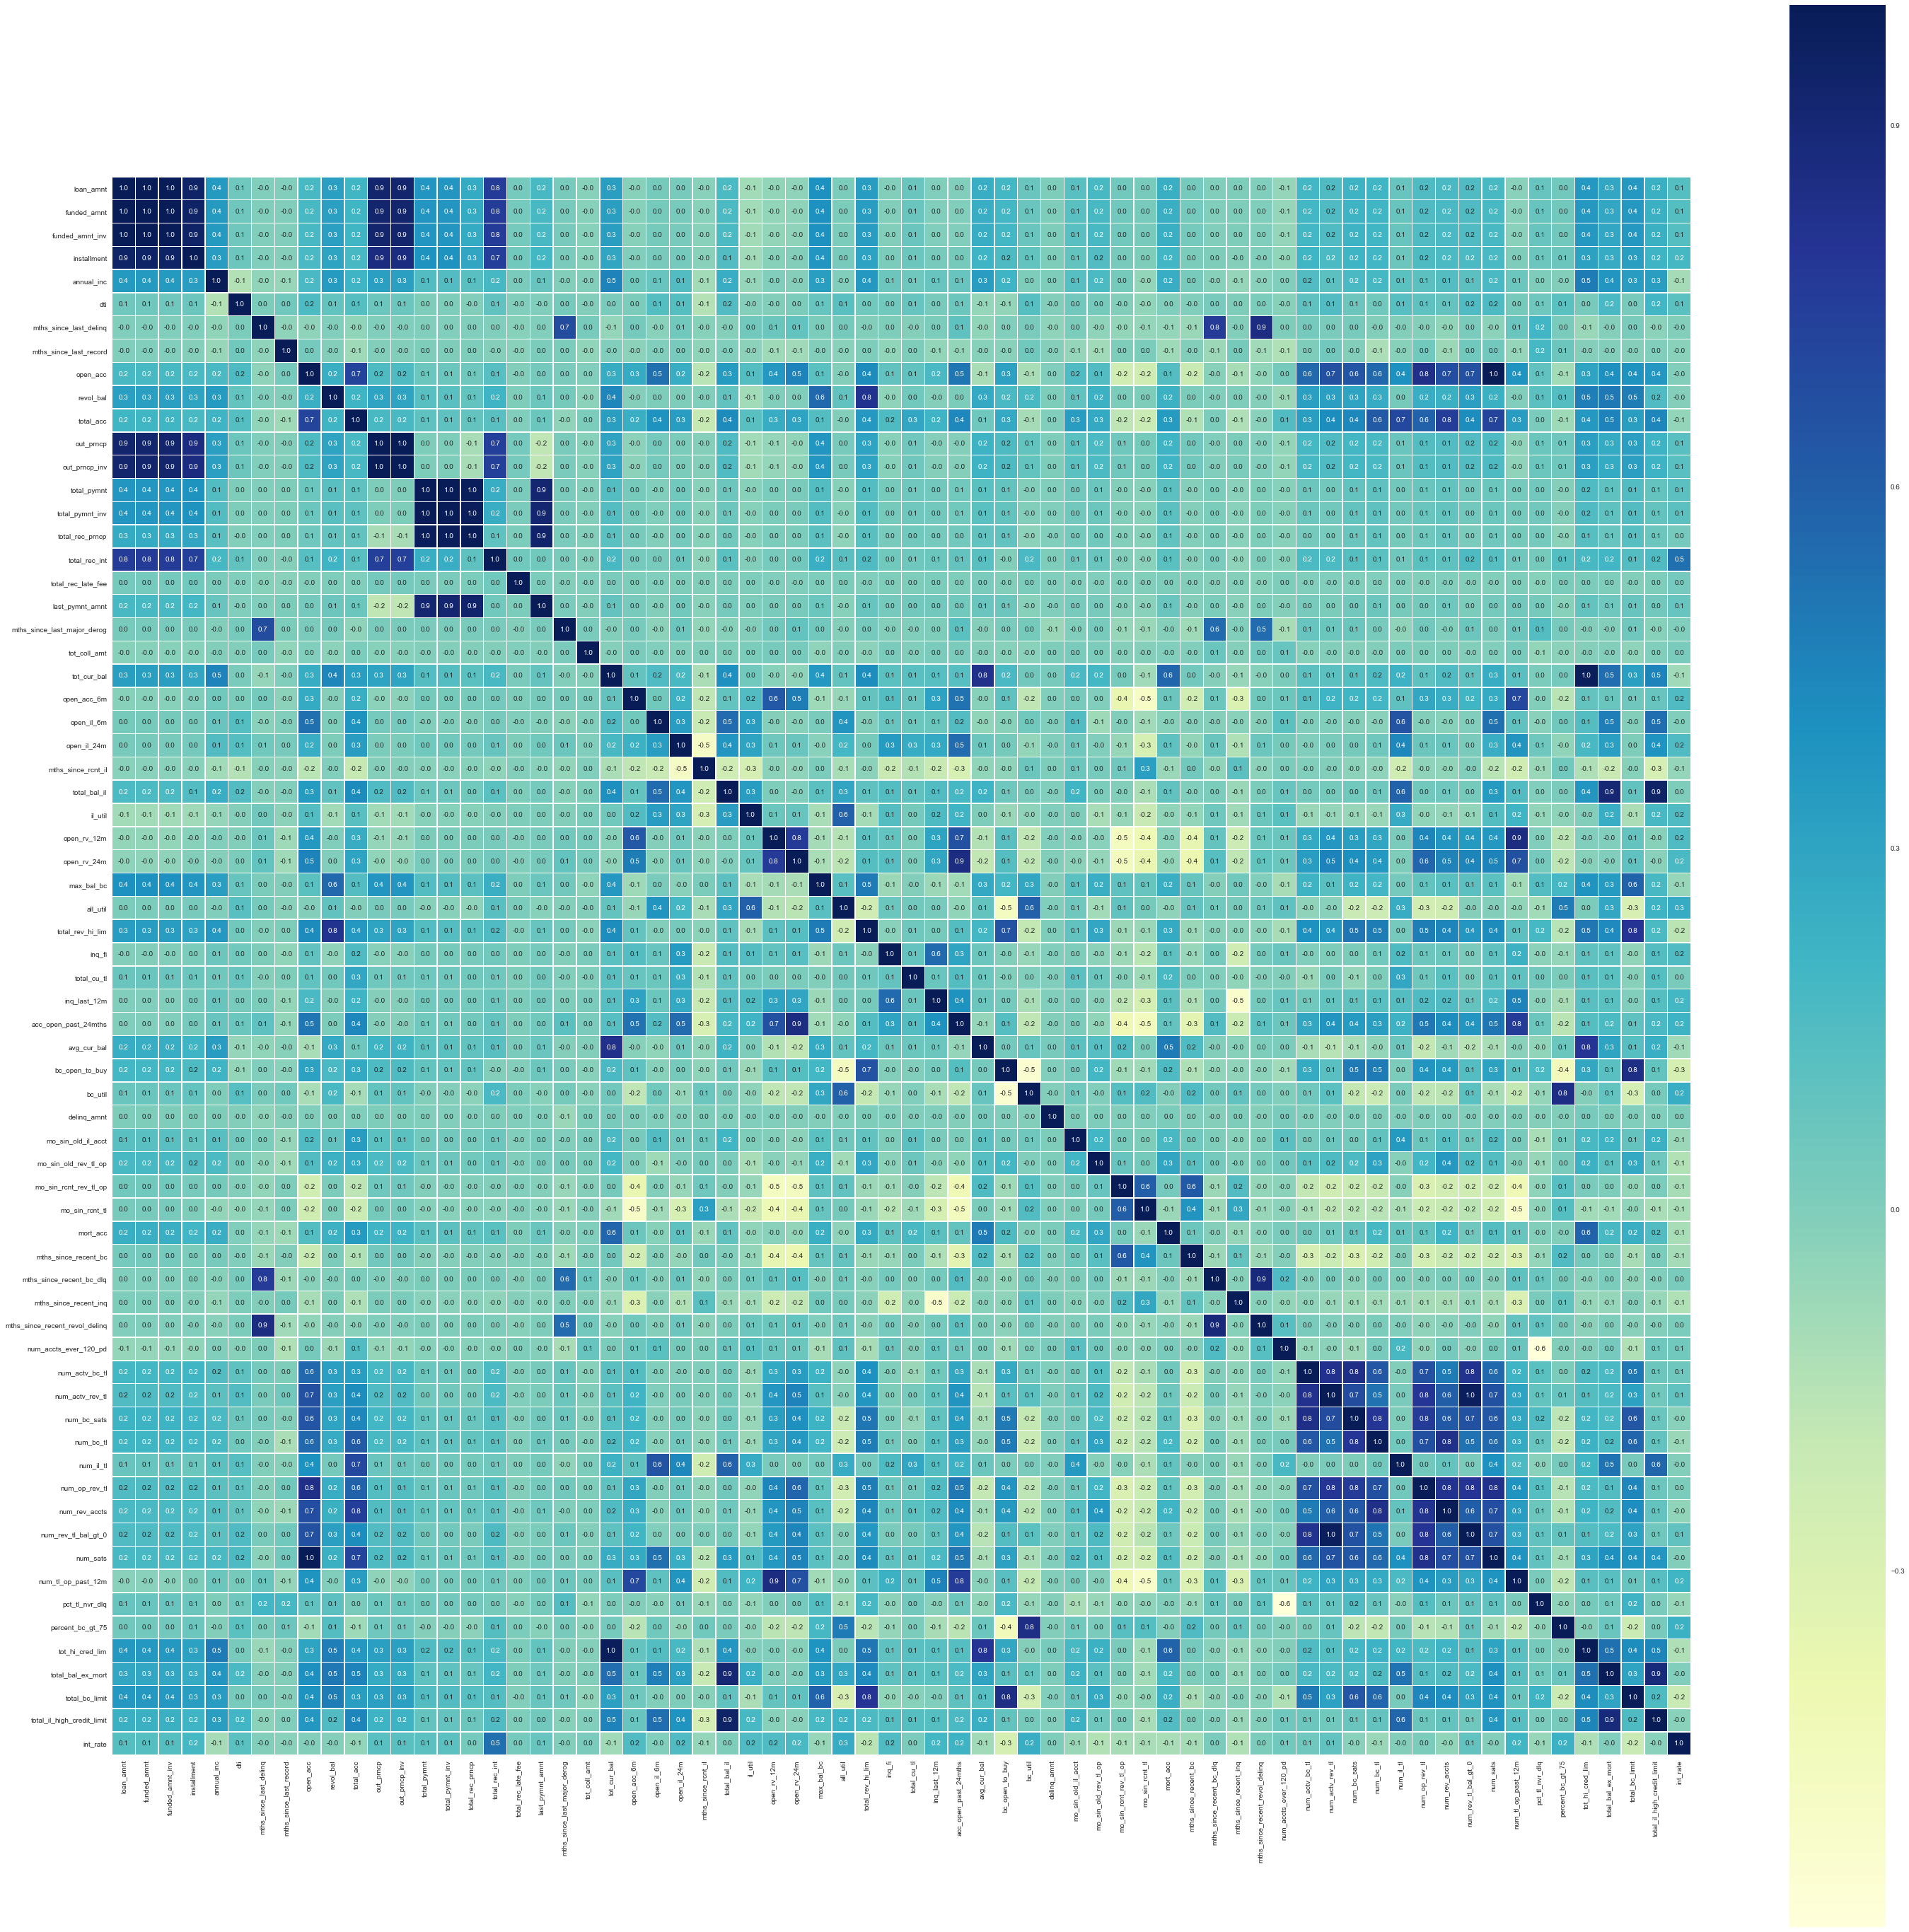

In [579]:
####the correlation of numeric columns 
f, ax = plt.subplots(figsize=(50, 50))
corr = select_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           annot=True,fmt='.1f',linewidths=.5,square=True,
            cmap="YlGnBu")
           #cmap='Blues_r')


In [580]:
print('sub_grade' in select_df.columns.tolist())
print('grade' in select_df.columns.tolist())

True
True


In [581]:
corr.shape

(68, 68)

In [582]:
#####use a model----multiple linear regression#####

#### prepare for the dataset
category_cols=input_df.dtypes.index[input_df.dtypes!='float64'].tolist()
print(len(category_cols))

22


In [583]:
input_df[category_cols].head(5)

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,hardship_flag
0,36 months,A,A4,Project Lead,10+ years,MORTGAGE,Source Verified,Jun-2017,Current,n,...,206xx,MD,Apr-1999,62.9%,w,Sep-2017,Oct-2017,Sep-2017,INDIVIDUAL,N
1,36 months,A,A4,VP of Professional Services,2 years,MORTGAGE,Not Verified,Jun-2017,Current,n,...,461xx,IN,Feb-2004,14.8%,w,Sep-2017,Oct-2017,Sep-2017,INDIVIDUAL,N
2,36 months,A,A1,Regional Manager-Customer Success,9 years,MORTGAGE,Not Verified,Jun-2017,Current,n,...,480xx,MI,May-2001,29%,w,Sep-2017,Oct-2017,Sep-2017,INDIVIDUAL,N
3,36 months,C,C5,Executive Director,9 years,RENT,Not Verified,Jun-2017,Current,n,...,595xx,MT,Feb-2008,36.3%,w,Sep-2017,Oct-2017,Sep-2017,INDIVIDUAL,N
4,36 months,B,B4,NaN,n/a,MORTGAGE,Not Verified,Jun-2017,Current,n,...,605xx,IL,Jun-1966,17.8%,w,Sep-2017,Oct-2017,Sep-2017,INDIVIDUAL,N


In [598]:
input_df_category=input_df[category_cols]

In [ ]:
input_df_dum=input_df.copy()
for col in input_df_category.columns:
    col_df=pd.get_dummies(input_df[col],prefix=col,prefix_sep='__')
    col_df=col_df.iloc[:,1:]
    input_df_dum=pd.concat([input_df_dum.drop(col,axis=1),col_df],axis=1)

In [605]:
print(input_df_dum.columns)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'last_pymnt_amnt', 'mths_since_last_major_derog',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_eve

In [592]:
input_df

6782

In [597]:
print(browser_dummy.columns.tolist())

[' \tEmployee Strategies Manager', '    Food Preparation Worker', '  Business service representative ', '  I am the owner ', '  Interpreter', '  Sergeant first class ', ' Accountant', ' Administrative Asssitant', ' Administrator ', ' Airline pilot ', ' Airport customer service ', ' Assistant Manager ', ' Assistant manager', ' Assistant principal ', ' Assistant store director ', ' Associate 3 ', ' Auto technician ', ' Behavioral therapist ', ' Benefits cordinator ', ' Bookstore manager ', ' Car Porter . Janitorial business', ' Care Coordination Social Worker', ' Certified Nurse Aide', ' Certified nursing assistant ', ' Channel Manager', ' Construction superintendent', ' Corrections program coordinator ', ' Crew chief ', ' Criminal investigator', ' Deli clerk ', ' Development Relationship Manager', ' Dietary ', ' Direct Support Professional', ' Director', ' Director Quality Assurance', ' Director Services Operations', ' Director of FP Accounting', ' Director of business services ', ' Dir